In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def ind(x, a, b) :
    if a<x<b :
        return 1
    else : 
        return 0

def metal_demand(energy_demand,time, tech_lifetime, metal_energy, mass_pow, pow_by_en_unit) :
    """
    energy_demand: array or list, annual energy demand for the source
    time: list with the corresponding years
    tech_lifetime: int, life expectancy of a given technology (year)
    metal_energy: energy required to produce one unit of metal
    mass_pow: mass of metal required to install a new power unit
    pow_by_en_unit: installed capacity required to produce a given amount of energy in one year
    """
    new_demand =  np.concatenate((np.array([energy_demand[0]/tech_lifetime]), np.array([abs(energy_demand[i]-energy_demand[i-1]) for i in range(1, len(energy_demand))])))

    if time[len(time)-1]-time[0]> tech_lifetime :
        for i in range(1,len(time)-1-tech_lifetime) :
           new_demand[i+tech_lifetime]=new_demand[i]+new_demand[i+tech_lifetime]

        for i in range(0,tech_lifetime) :
            new_demand[i]+= new_demand[0]/tech_lifetime            
     
    

    pow_demand = np.array(new_demand) / pow_by_en_unit
    metal_demand = pow_demand*mass_pow
    energy_required = metal_demand*metal_energy

    return metal_demand

    


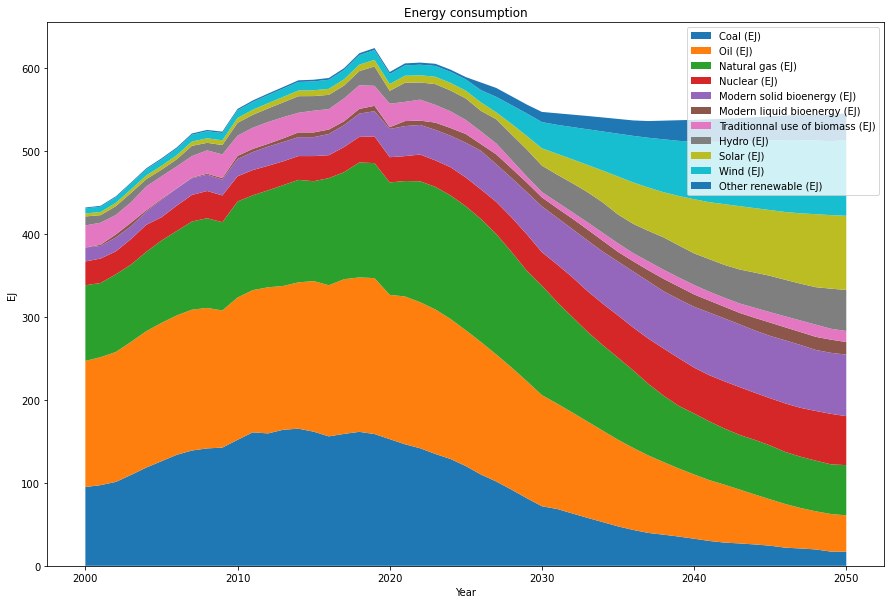

In [7]:
scenario = pd.read_csv('../BDD/scenario_net_zero.csv', sep=';')
scenario.head()
dict = scenario.to_dict('list')
dict.pop('Year')
year =scenario['Year']
fig, ax = plt.subplots(1,1,figsize=(15,10))

ax.stackplot(year, dict.values(),
             labels=dict.keys())
plt.legend()
ax.set_title('Energy consumption')
ax.set_xlabel('Year')
ax.set_ylabel('EJ')

plt.show()


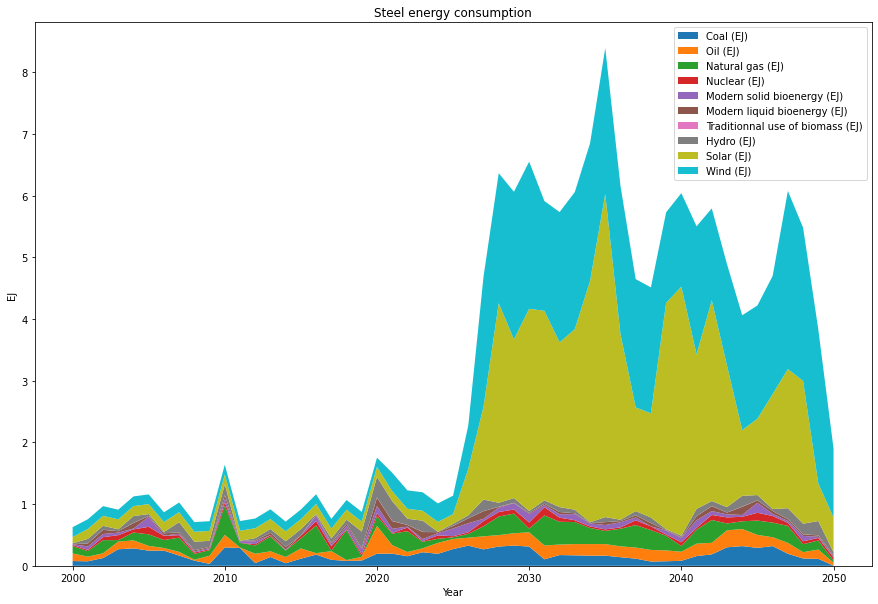

In [29]:
life_time = [40,40,40,40,40,40,40,40,25,20]
steel_en = 20 #GJ/t
mass_pow = [50,50,80,25,50,50,1,25, 150,175] #t/MW
pow_by_en_unit = [8760,8760, 8760, 5263, 8760,8760,8760, 3290, 1219, 1952] #h
steel = {}
for i in range(1,len(scenario.columns)-1) :
    name = scenario.columns[i]
    need = metal_demand(scenario[name]*277777777.77778,scenario['Year'], life_time[i-1], steel_en, mass_pow[i-1], pow_by_en_unit[i-1])
    steel[name] = need*20/(10**9)

fig, ax = plt.subplots(1,1,figsize=(15,10))

ax.stackplot(year, steel.values(),
             labels=dict.keys())
plt.legend()
ax.set_title('Steel energy consumption')
ax.set_xlabel('Year')
ax.set_ylabel('EJ')

plt.show()

In [30]:
scenario.head()

,Year,Coal (EJ),Oil (EJ),Natural gas (EJ),Nuclear (EJ),Modern solid bioenergy (EJ),Modern liquid bioenergy (EJ),Traditionnal use of biomass (EJ),Hydro (EJ),Solar (EJ),Wind (EJ),Other renewable (EJ)
0,2000,94.937,151.898,91.140,28.718,16.851,0.000,26.583,10.817,3.60,6.12,1.00
1,2001,97.177,154.170,89.407,29.454,15.129,1.511,26.538,9.069,3.83,6.42,1.07
2,2002,101.078,156.504,93.554,27.669,16.754,3.631,23.462,10.574,4.06,6.72,1.14
3,2003,109.481,160.329,93.143,30.693,15.476,4.359,24.509,11.280,4.29,7.02,1.21
4,2004,118.340,164.298,95.605,32.605,15.911,1.579,28.771,8.663,4.52,7.32,1.28


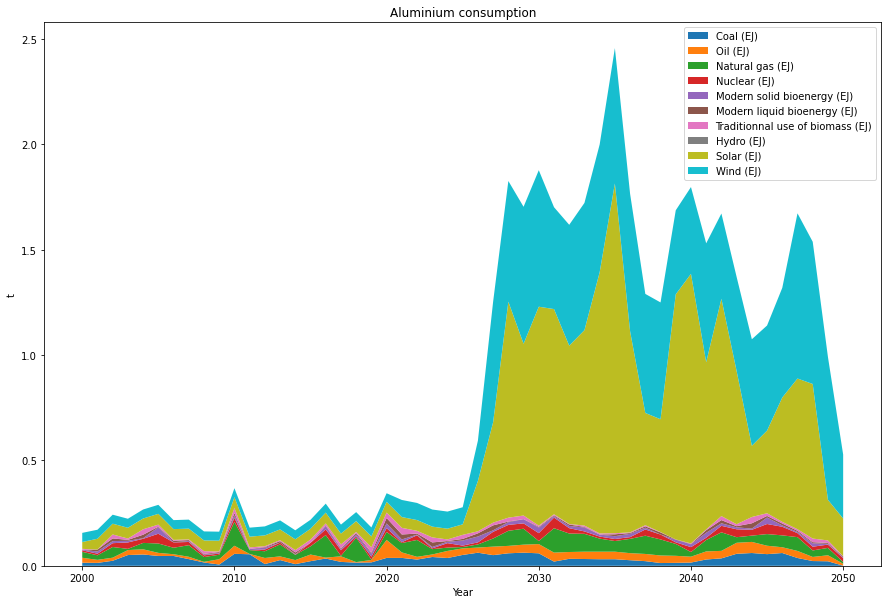

In [31]:
life_time = [40,40,40,40,40,40,40,40,25,20]
al_en = 190 #GJ/t
mass_pow_al = [1,1,2,1,1,1,1,0,5, 5] #t/MW
pow_by_en_unit = [8760,8760, 8760, 5263, 8760,8760,8760, 3290, 1219, 1952] #h

aluminium = {}
for i in range(1,len(scenario.columns)-1) :
    name = scenario.columns[i]
    need = metal_demand(scenario[name]*277777777.77778,scenario['Year'], life_time[i-1], al_en, mass_pow_al[i-1], pow_by_en_unit[i-1])
    aluminium[name] = need*190/(10**9)

fig, ax = plt.subplots(1,1,figsize=(15,10))

ax.stackplot(year, aluminium.values(),
             labels=dict.keys())
plt.legend()
ax.set_title('Aluminium consumption')
ax.set_xlabel('Year')
ax.set_ylabel('t')

plt.show()

In [32]:
scenario.head()

,Year,Coal (EJ),Oil (EJ),Natural gas (EJ),Nuclear (EJ),Modern solid bioenergy (EJ),Modern liquid bioenergy (EJ),Traditionnal use of biomass (EJ),Hydro (EJ),Solar (EJ),Wind (EJ),Other renewable (EJ)
0,2000,94.937,151.898,91.140,28.718,16.851,0.000,26.583,10.817,3.60,6.12,1.00
1,2001,97.177,154.170,89.407,29.454,15.129,1.511,26.538,9.069,3.83,6.42,1.07
2,2002,101.078,156.504,93.554,27.669,16.754,3.631,23.462,10.574,4.06,6.72,1.14
3,2003,109.481,160.329,93.143,30.693,15.476,4.359,24.509,11.280,4.29,7.02,1.21
4,2004,118.340,164.298,95.605,32.605,15.911,1.579,28.771,8.663,4.52,7.32,1.28


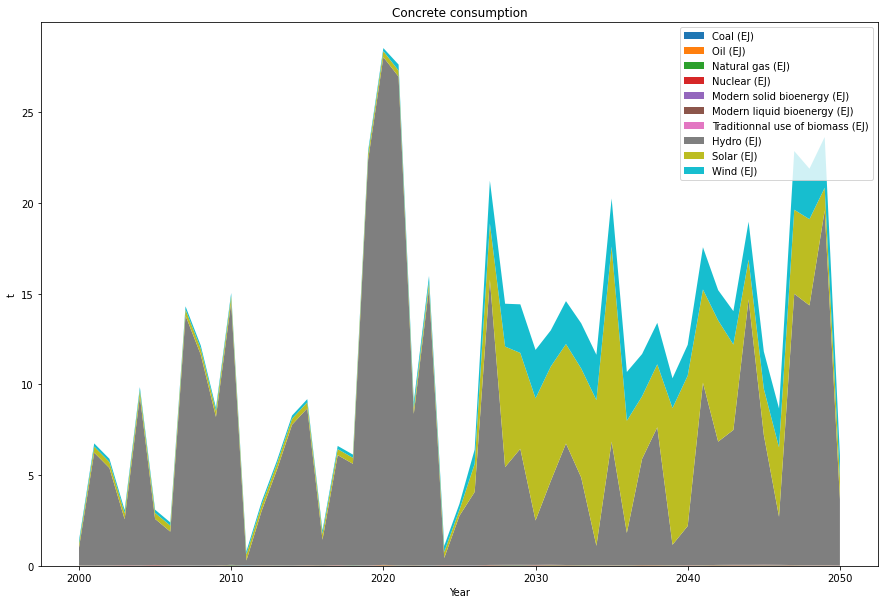

In [33]:
life_time = [40,40,40,40,40,40,40,40,25,20]
concrete_en = 5.6 #GJ/t
mass_pow_concrete = [10,10,10,15,1,1,1,7500,1100, 700] #t/MW
pow_by_en_unit = [8760,8760, 8760, 5263, 8760,8760,8760, 3290, 1219, 1952] #h

concrete = {}
for i in range(1,len(scenario.columns)-1) :
    name = scenario.columns[i]
    need = metal_demand(scenario[name]*277777777.77778,scenario['Year'], life_time[i-1], al_en, mass_pow_concrete[i-1], pow_by_en_unit[i-1])
    concrete[name] = need*5.6/(10**9)

fig, ax = plt.subplots(1,1,figsize=(15,10))

ax.stackplot(year, concrete.values(),
             labels=dict.keys())
plt.legend()
ax.set_title('Concrete consumption')
ax.set_xlabel('Year')
ax.set_ylabel('t')

plt.show()

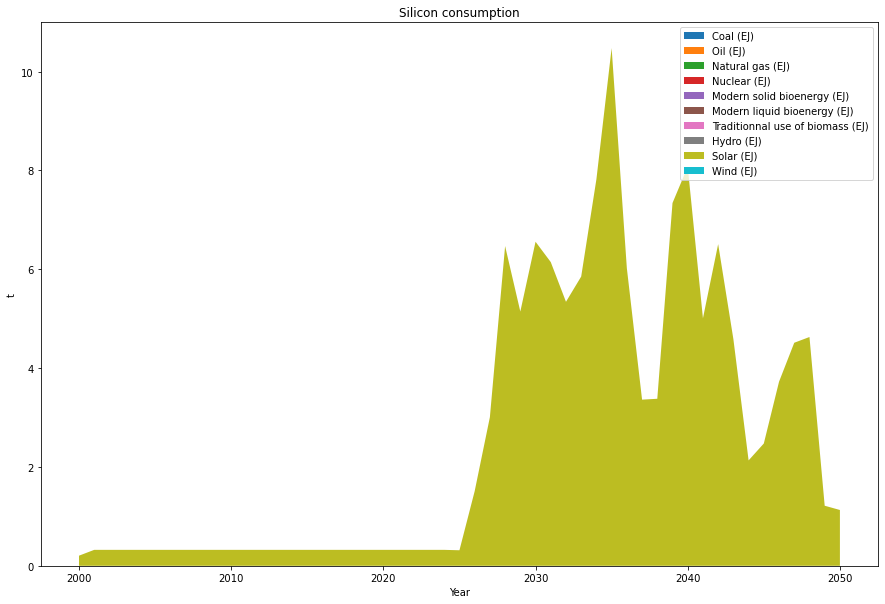

In [34]:
life_time = [40,40,40,40,40,40,40,40,25,20]
si_en = 1100 #GJ/t
mass_pow_si = [0,0,0,0,0,0,0,0,6,0] #t/MW
pow_by_en_unit = [8760,8760, 8760, 5263, 8760,8760,8760, 3290, 1219, 1952] #h

si={}
for i in range(1,len(scenario.columns)-1) :
    name = scenario.columns[i]
    need = metal_demand(scenario[name]*277777777.77778,scenario['Year'], life_time[i-1], al_en, mass_pow_si[i-1], pow_by_en_unit[i-1])
    si[name] = need*1000/(10**9)

fig, ax = plt.subplots(1,1,figsize=(15,10))

ax.stackplot(year, si.values(),
             labels=dict.keys())
plt.legend()
ax.set_title('Silicon consumption')
ax.set_xlabel('Year')
ax.set_ylabel('t')

plt.show()

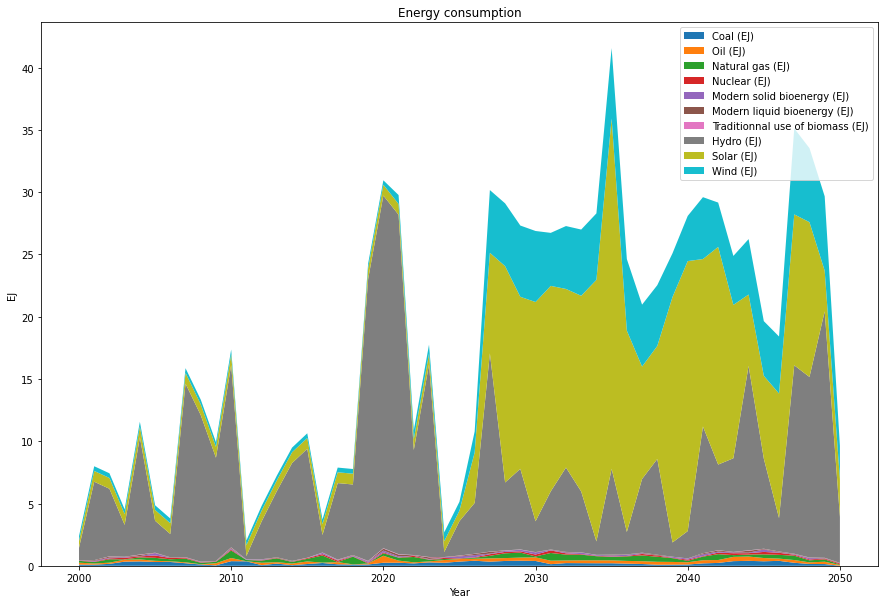

In [35]:
energy={}
for key in list(steel.keys()) :
    energy[key] = si[key]+concrete[key]+aluminium[key]+steel[key]

fig, ax = plt.subplots(1,1,figsize=(15,10))

ax.stackplot(year, energy.values(),
             labels=dict.keys())
plt.legend()
ax.set_title('Energy consumption')
ax.set_xlabel('Year')
ax.set_ylabel('EJ')

plt.show()

